In [10]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Read the CSV file
df = pd.read_csv('../data/runtimes_full.csv')
#Check if the data is read correctly
print(df.columns)
# Convert scientific notation to regular numbers + transform time in nanoseconds for a 100 runs into average time in microseconds
df['Linear Search'] = df['Linear Search'].apply(lambda x: float(x)/100000.0)
df['Binary Search'] = df['Binary Search'].apply(lambda x: float(x)/100000.0)
df['Size'] = df['Size'].apply(lambda x: int(x/1000))
df

Index(['Size', 'Linear Search', 'Binary Search'], dtype='object')


,Size,Linear Search,Binary Search
0,10,87.2375,0.46133
1,20,171.8670,0.47604
2,30,252.6050,0.49073
3,40,350.5410,0.52851
4,50,453.2820,0.55362
...,...,...,...
95,960,10228.2000,1.15648
96,970,8771.2000,1.21446
97,980,9981.8200,1.54821
98,990,10289.8000,1.19927


In [12]:
# Create fitting curves
x = df['Size']
y_linear = df['Linear Search']
y_binary = df['Binary Search']

# Linear fit for Linear Search
linear_coef = np.polyfit(x, y_linear, 1)
linear_fit = np.poly1d(linear_coef)

# Log fit for Binary Search
log_m,log_b = np.polyfit(np.log(x), y_binary, 1)
log_fit = lambda x: log_m * np.log(x) + log_b

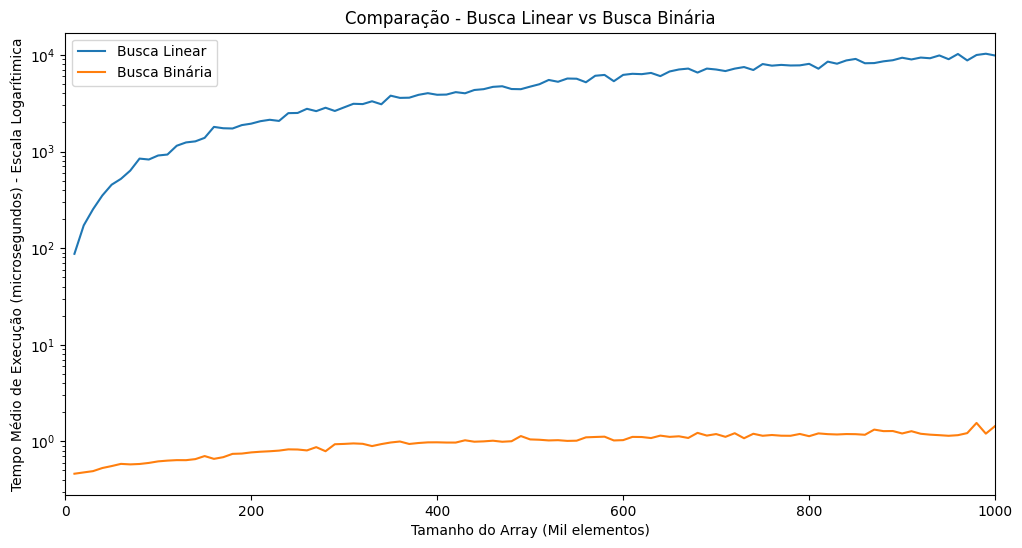

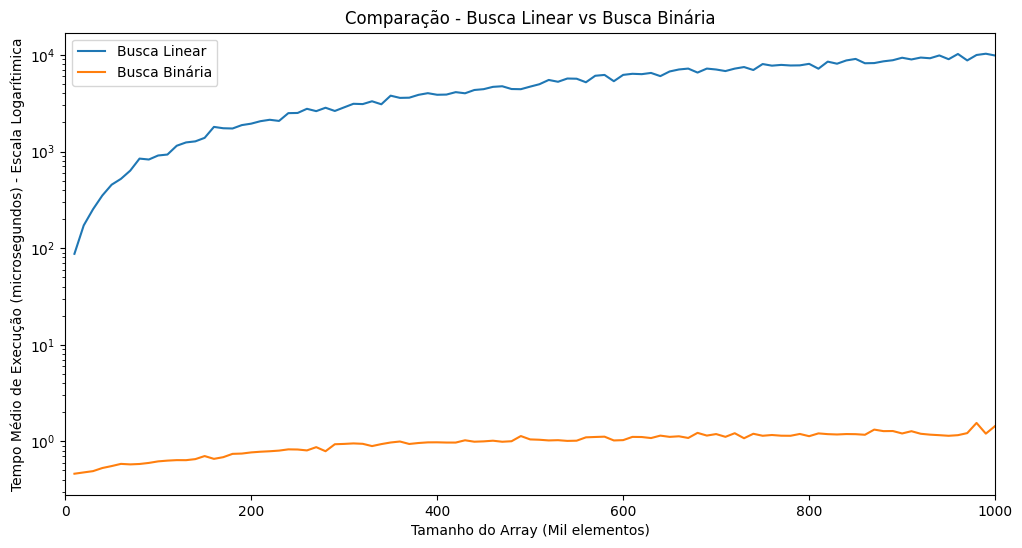

In [13]:
# Linear Search + Binary Search plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
sns.lineplot(data=df, x=x, y='Linear Search', label='Busca Linear',ax=ax)
sns.lineplot(data=df , x=x, y='Binary Search', label='Busca Binária',ax=ax)

ax.set_xlim(0,1000)

x_label = 'Tamanho do Array (Mil elementos)'
y_label = 'Tempo Médio de Execução (microsegundos)'
#Customizing the plot
ax.update({'title':'Comparação - Busca Linear vs Busca Binária','yscale':'log','xlabel':x_label,'ylabel':y_label + ' - Escala Logarítimica'})
fig.savefig('../images/search_comparison.png')

fig

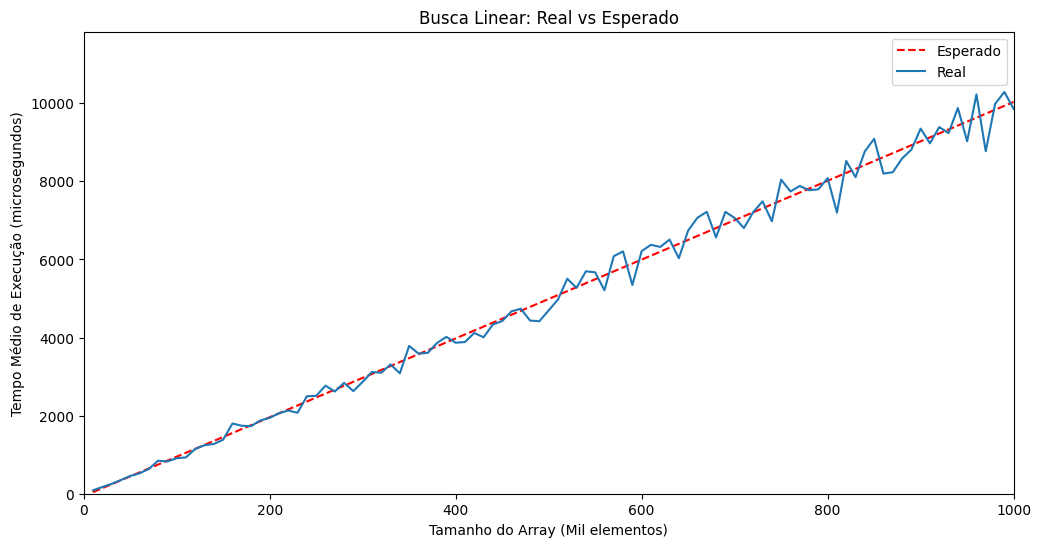

In [14]:
# Linear Search + Linear Fitting plot
fig.clear()
ax = fig.add_subplot(111)
ax.plot(x, linear_fit(x), '--r', label='Esperado')
sns.lineplot(data=df, x=x, y='Linear Search', label='Real',ax=ax)
ax.set_xlim(0,1000)
ax.set_ylim(0,1.15*df['Linear Search'].max())
ax.update({'title': 'Busca Linear: Real vs Esperado','xlabel': x_label, 'ylabel': y_label})
fig.savefig('../images/linear_search_fitting.png')

fig

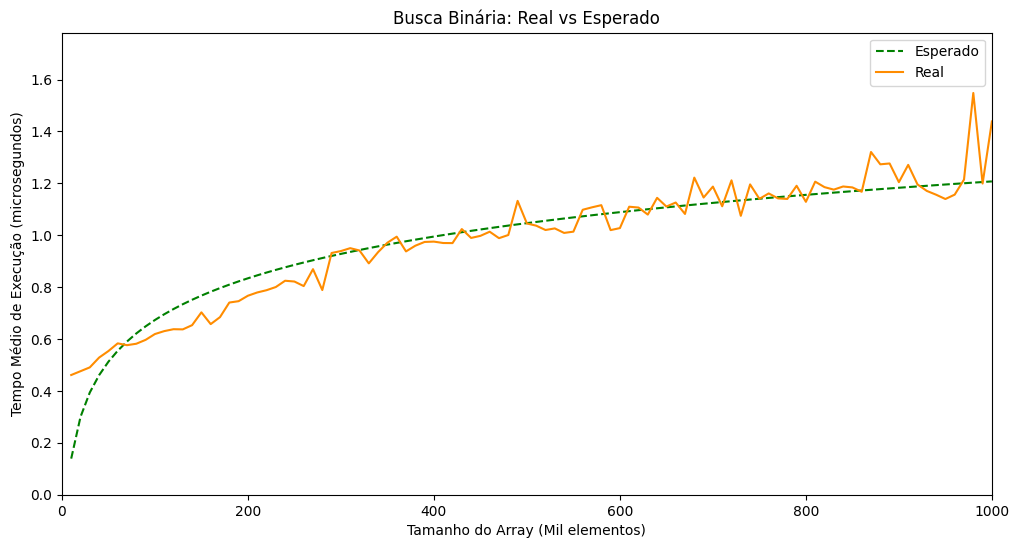

In [15]:
# Binary Search + Log FItting plot 
fig.clear()
ax = fig.add_subplot(111)
ax.plot(x, log_fit(x), '--g', label='Esperado')
sns.lineplot(ax=ax,data=df, x=x, y='Binary Search', label='Real', color='darkorange')
ax.set_xlim(0,1000)
ax.set_ylim(0,1.15*df['Binary Search'].max())
ax.update({'xlabel':x_label, 'ylabel':y_label, 'title': 'Busca Binária: Real vs Esperado'})

fig.savefig('../images/binary_search_fitting.png')
fig

In [16]:
#Now for Small array sizes
df = pd.read_csv('../data/runtimes_mini.csv')

# Convert scientific notation to regular numbers
df['Linear Search'] = df['Linear Search'].apply(lambda x: float(x)/100.0)
df['Binary Search'] = df['Binary Search'].apply(lambda x: float(x)/100.0)

x_label = 'Tamanho do Array'
y_label = 'Tempo Médio de Execução (nanosegundos)'
df

,Size,Linear Search,Binary Search
0,1,77.23,236.58
1,2,504.42,310.89
2,3,105.55,277.70
3,4,101.02,107.08
4,5,114.92,131.04
...,...,...,...
995,996,9461.35,334.20
996,997,8717.32,339.00
997,998,10745.80,395.42
998,999,10463.80,358.46


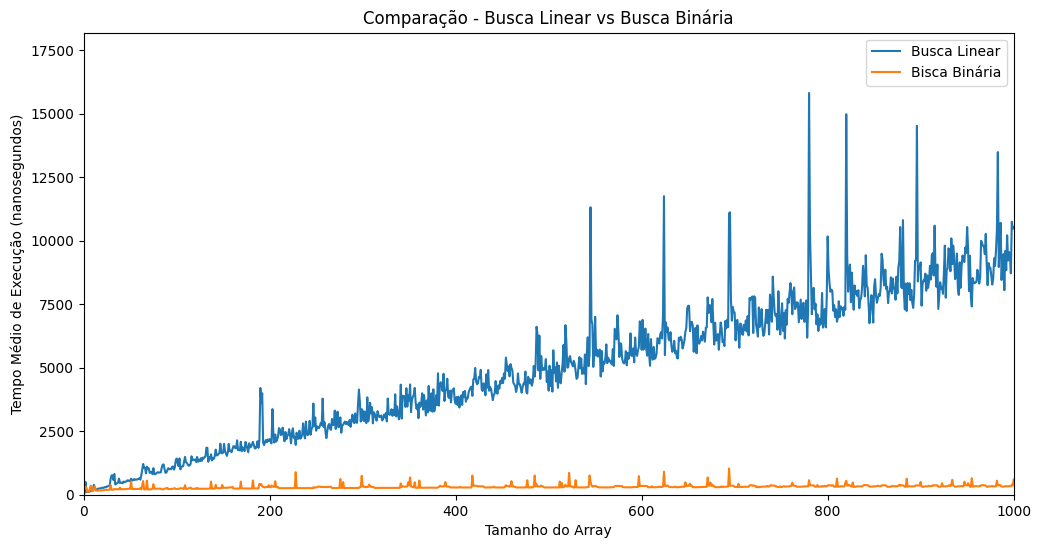

In [17]:
fig.clear()
ax = fig.add_subplot(111)
sns.lineplot(data=df, x='Size', y='Linear Search', label='Busca Linear',ax=ax)
sns.lineplot(data=df , x='Size', y='Binary Search', label='Bisca Binária',ax=ax)

ax.set_xlim(0,1000)
ax.set_ylim(0,1.15*df['Linear Search'].max())

ax.update({'title':'Comparação - Busca Linear vs Busca Binária','xlabel':x_label,'ylabel':y_label})
fig.savefig('../images/search_comparison_mini.png')
fig

In [18]:
flag = True if (df['Binary Search'][i] >= df['Linear Search'][i] for i in range(len(df['Binary Search']))) else False
print(flag)

True
